In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,AdaBoostClassifier
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor



In [2]:
df=pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
X=df.drop(columns=['math_score'],axis=1)
y=df['math_score']

In [29]:
feature_names1 = df.drop(columns=['math_score']).columns.tolist()
feature_names1

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course',
 'reading_score',
 'writing_score']

In [5]:
X,y

(     gender race_ethnicity parental_level_of_education         lunch  \
 0    female        group B           bachelor's degree      standard   
 1    female        group C                some college      standard   
 2    female        group B             master's degree      standard   
 3      male        group A          associate's degree  free/reduced   
 4      male        group C                some college      standard   
 ..      ...            ...                         ...           ...   
 995  female        group E             master's degree      standard   
 996    male        group C                 high school  free/reduced   
 997  female        group C                 high school  free/reduced   
 998  female        group D                some college      standard   
 999  female        group D                some college  free/reduced   
 
     test_preparation_course  reading_score  writing_score  
 0                      none             72             74  


In [7]:
numerical_columns=X.select_dtypes(exclude='object').columns
cat_features=X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer


numeric_transformer=StandardScaler()
oh_transformer =OneHotEncoder()


preprocessor= ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ('StandardScaler',numeric_transformer,numerical_columns),
    ]
)

In [8]:
X=preprocessor.fit_transform(X)

In [9]:
X


array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]], shape=(1000, 19))

In [10]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rsme=np.sqrt(mse)
    r2_square=r2_score(true,predicted)
    return mae,rsme,r2_square

model training pipeline 

In [12]:
# Dictionary of models
models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Random Forest Regression": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoostRegressor": CatBoostRegressor(verbose=False),
    "Adaboost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for name, model in models.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(name)
    model_list.append(name)

    print('Model performance for training set:')
    print("RMSE:", model_train_rmse)
    print("MAE:", model_train_mae)
    print("R²:", model_train_r2)

    print("-------------------------------------")
    print('Model performance for test dataset:')
    print("RMSE:", model_test_rmse)
    print("MAE:", model_test_mae)
    print("R²:", model_test_r2)

    r2_list.append(model_test_r2)
    print("----------------------------------------")


LinearRegression
Model performance for training set:
RMSE: 5.323050852720514
MAE: 4.266711846071957
R²: 0.8743172040139593
-------------------------------------
Model performance for test dataset:
RMSE: 5.393993869732845
MAE: 4.214763142474852
R²: 0.8804332983749564
----------------------------------------
Lasso
Model performance for training set:
RMSE: 6.593815587795565
MAE: 5.206302661246526
R²: 0.8071462015863458
-------------------------------------
Model performance for test dataset:
RMSE: 6.519694535667419
MAE: 5.157881810347763
R²: 0.8253197323627853
----------------------------------------
Ridge
Model performance for training set:
RMSE: 5.323324922741654
MAE: 4.264987823725981
R²: 0.8743042615212909
-------------------------------------
Model performance for test dataset:
RMSE: 5.390387016935638
MAE: 4.21110068801426
R²: 0.8805931485028738
----------------------------------------
K-Neighbors Regressor
Model performance for training set:
RMSE: 5.707884897227694
MAE: 4.51675
R²: 

In [13]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['model_name','r2_score']).sort_values(by=['r2_score'],ascending=False)

,model_name,r2_score
2,Ridge,0.880593
0,LinearRegression,0.880433
6,CatBoostRegressor,0.851632
7,Adaboost Regressor,0.850802
4,Random Forest Regression,0.847247
5,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813


In [14]:
regressor=LinearRegression()



In [15]:
regressor.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
y_pred=regressor.predict(X_test)

In [17]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(LinearRegression(), X_train, y_train, scoring='r2', cv=5)
print("Mean R²:", np.mean(scores), "Std:", np.std(scores))



Mean R²: 0.8685885989218132 Std: 0.011744285550450595


In [18]:
from sklearn.linear_model import RidgeCV, LassoCV
ridge = RidgeCV(alphas=[0.1, 1, 10], cv=5).fit(X_train, y_train)
lasso = LassoCV(alphas=[0.001, 0.01, 0.1, 1], cv=5).fit(X_train, y_train)



In [19]:
# Ridge
y_train_pred_ridge = ridge.predict(X_train)
y_test_pred_ridge = ridge.predict(X_test)
ridge_train_mae, ridge_train_rmse, ridge_train_r2 = evaluate_model(y_train, y_train_pred_ridge)
ridge_test_mae, ridge_test_rmse, ridge_test_r2 = evaluate_model(y_test, y_test_pred_ridge)

# Lasso
y_train_pred_lasso = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)
lasso_train_mae, lasso_train_rmse, lasso_train_r2 = evaluate_model(y_train, y_train_pred_lasso)
lasso_test_mae, lasso_test_rmse, lasso_test_r2 = evaluate_model(y_test, y_test_pred_lasso)

print("Ridge Test R²:", ridge_test_r2)
print("Lasso Test R²:", lasso_test_r2)


Ridge Test R²: 0.8805931485028738
Lasso Test R²: 0.8804771075573584


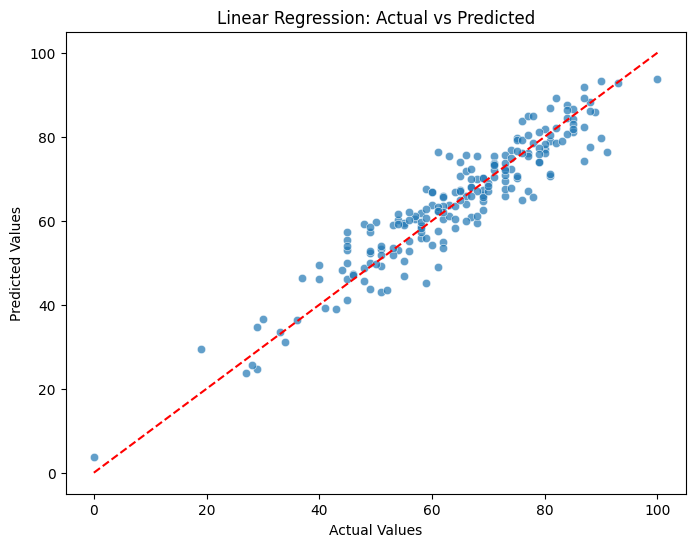

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = regressor.predict(X_test)  # assuming 'linear_model' is trained

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()


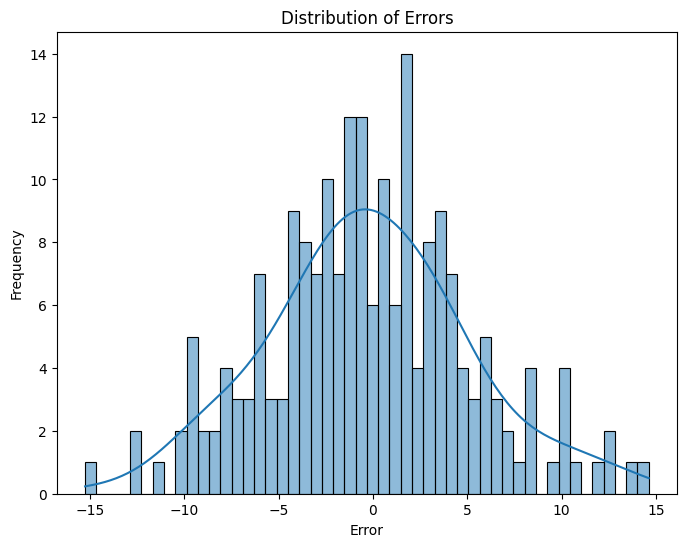

In [21]:
# After model predictions...
errors = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(errors, kde=True, bins=50)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Errors')
plt.show()

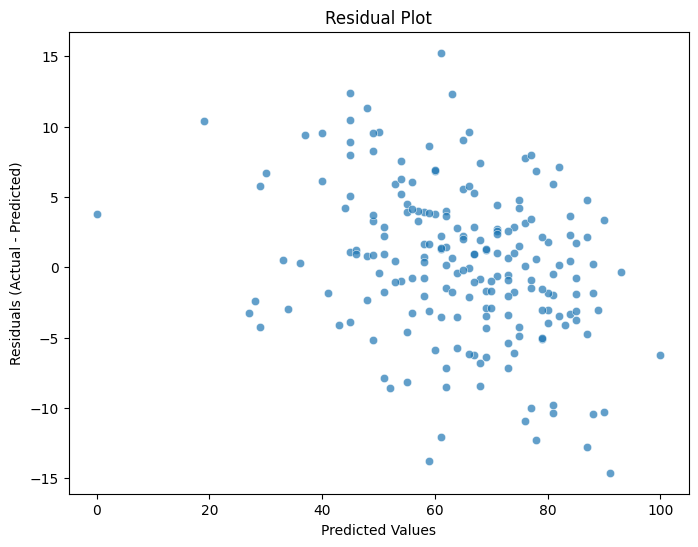

In [22]:
def plot_residuals(y_true, y_pred):
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=y_true, y=y_pred - y_true, alpha=0.7)
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals (Actual - Predicted)")
    plt.title("Residual Plot")
    plt.show()

plot_residuals(y_test, y_pred)

In [23]:
from sklearn.model_selection import GridSearchCV

# Example for Linear Regression tuning
param_grid = {'fit_intercept': [True, False]}
grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'fit_intercept': True}
Best Score: 0.8685885989218132


In [26]:
feature_names

['Feature_0',
 'Feature_1',
 'Feature_2',
 'Feature_3',
 'Feature_4',
 'Feature_5',
 'Feature_6',
 'Feature_7',
 'Feature_8',
 'Feature_9',
 'Feature_10',
 'Feature_11',
 'Feature_12',
 'Feature_13',
 'Feature_14',
 'Feature_15',
 'Feature_16',
 'Feature_17',
 'Feature_18']

In [25]:
# Streamlined evaluation function
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rsme = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    return mae, rsme, r2

# Updated model training pipeline
models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    # Add more models if needed
}

# Organize the code into functions for better readability
def preprocess_data(df):
    X = df.drop(columns=['math_score'])
    y = df['math_score']
    
    numerical_columns = X.select_dtypes(exclude='object').columns
    cat_features = X.select_dtypes(include='object').columns
    
    preprocessor = ColumnTransformer(
        [
            ("OneHotEncoder", OneHotEncoder(), cat_features),
            ('StandardScaler', StandardScaler(), numerical_columns),
        ]
    )
    
    X = preprocessor.fit_transform(X)
    return X, y

def train_evaluate(models, X_train, y_train, X_test, y_test):
    results = []
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        train_mae, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
        test_mae, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)
        
        results.append({
            'Model': name,
            'Train MAE': train_mae,
            'Train RMSE': train_rmse,
            'Train R²': train_r2,
            'Test MAE': test_mae,
            'Test RMSE': test_rmse,
            'Test R²': test_r2
        })
    
    return pd.DataFrame(results)

# Execute the pipeline
X, y = preprocess_data(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results_df = train_evaluate(models, X_train, y_train, X_test, y_test)
print(results_df.sort_values(by='Test R²', ascending=False))

              Model  Train MAE  Train RMSE  Train R²  Test MAE  Test RMSE  \
0  LinearRegression   4.266712    5.323051  0.874317  4.214763   5.393994   
1             Lasso   5.206303    6.593816  0.807146  5.157882   6.519695   

    Test R²  
0  0.880433  
1  0.825320  


In [ ]:
#code to print hello world in python 

def factorial():
    print